In [7]:
from IPython.display import Image
from IPython.display import display
import numpy as np

# inline plotting instead of popping out
%matplotlib inline

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)
from lib import *

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() 
model.add(Dense(input_dim=512, output_dim=32))
model.add(Activation('relu'))
model.add(Dense(output_dim=1))
model.add(Activation('sigmoid'))

Using TensorFlow backend.
/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=512, units=32)`
/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [3]:
# for a binary classification problem

from keras.optimizers import SGD

# instantiate an optimizer with specific parameters
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
def gen_nn(input_dim = 512, width = 32, depth = 2):
    model = Sequential()
    model.add(Dense(input_dim=input_dim, output_dim=width))
    model.add(Activation('relu'))
    for k in range(2, depth):
        model.add(Dense(output_dim=width))
        model.add(Activation('relu'))
    model.add(Dense(output_dim=1))
    model.add(Activation('sigmoid'))
    model.compile(optimizer='sgd',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [5]:
from sklearn.datasets import fetch_20newsgroups

# we take 2 news groups:
# 1) rec : recreational activities (entertainment)
# 2) sci : science
categories = [
    'rec.autos',
    'rec.motorcycles',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'sci.electronics',
    'sci.med',
    'sci.space',
]

# remove the following context, we only need the content
remove = ('headers', 'footers', 'quotes')

# after fetching the data
# content will store in newsgroups.data
# label will store in newsgroups.target
newsgroups = fetch_20newsgroups(subset = 'all', categories = categories,
                                shuffle = True, random_state = 0, remove = remove)

In [8]:
print('#Data size: %s' % np.shape(newsgroups.data))
print('Labels: %s' % np.unique(newsgroups.target))

#Data size: 7931
Labels: [0 1 2 3 4 5 6 7]


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# for simplicity, we only take 512 features
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 1), max_features = 512, sublinear_tf = True, 
                             max_df = 0.5, preprocessor = None, tokenizer = None)

X = vectorizer.fit_transform(newsgroups.data).toarray()
y = (newsgroups.target > 3).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 0)

# the dictionary map from word to feature index
dictionary = vectorizer.vocabulary_

# construct inverse_dictionary for later use
inverse_dictionary = {v: k for k, v in dictionary.items()}

In [14]:
import time

batch_size = 32

model = gen_nn(input_dim = X_train.shape[1])
%time his = model.fit(X_train, y_train, nb_epoch=400, \
                      batch_size=batch_size, \
                      validation_split=0.2, \
                      shuffle=True, verbose=0)
# evaluate trained model
score = model.evaluate(X_test, y_test, verbose=0)
print('\nTest loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=512, units=32)`
  app.launch_new_instance()
/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/Users/Shawn/anaconda/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


CPU times: user 2min 30s, sys: 51.3 s, total: 3min 21s
Wall time: 2min 18s

Test loss: 0.393
Test accuracy: 0.819


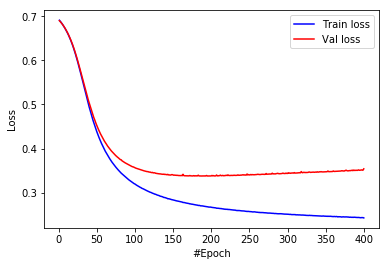

In [16]:
import matplotlib.pyplot as plt

train_loss = his.history['loss']
val_loss = his.history['val_loss']

# visualize training history
plt.plot(range(1, len(train_loss)+1), train_loss, color='blue', label='Train loss')
plt.plot(range(1, len(val_loss)+1), val_loss, color='red', label='Val loss')
plt.legend(loc="upper right")
plt.xlabel('#Epoch')
plt.ylabel('Loss')
plt.savefig('./output/fig-nn-val.png', dpi=300)
plt.show()

In [17]:
model = gen_nn(input_dim=X_train.shape[1])
%time his = model.fit(X_train, y_train, \
                      nb_epoch=150, \
                      batch_size=batch_size, \
                      validation_split=0.2, \
                      shuffle=True, verbose=0)
# evaluate trained model
score = model.evaluate(X_test, y_test, verbose=0)
print('\nTest loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=512, units=32)`
  app.launch_new_instance()
/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/Users/Shawn/anaconda/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


CPU times: user 53.5 s, sys: 19.9 s, total: 1min 13s
Wall time: 46.8 s

Test loss: 0.368
Test accuracy: 0.822


/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=512, units=32)`
  app.launch_new_instance()
/Users/Shawn/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/Users/Shawn/anaconda/lib/python3.6/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


CPU times: user 1min 23s, sys: 26.2 s, total: 1min 49s
Wall time: 1min 19s

Test loss: 0.368
Test accuracy: 0.823


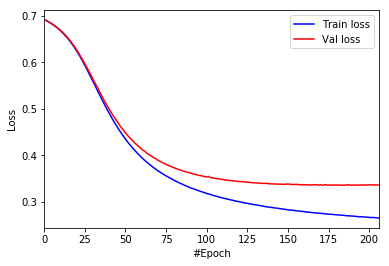

In [18]:
from keras.callbacks import EarlyStopping

model = gen_nn(input_dim=X_train.shape[1])

# monitor the validation loss
# min_delta : minimum change in the monitored quantity to qualify as an improvement
# patience : number of epochs with no improvement after which training will be stopped
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 20, verbose = 0)

%time his = model.fit(X_train, y_train, \
                      nb_epoch=1000, \
                      batch_size=batch_size, \
                      validation_split=0.2, \
                      shuffle=True, verbose=0, \
                      callbacks=[early_stop])

# evaluate trained model
score = model.evaluate(X_test, y_test, verbose=0)
print('\nTest loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

train_loss = his.history['loss']
val_loss = his.history['val_loss']

# visualize training history
plt.plot(range(1, len(train_loss)+1), train_loss, color='blue', label='Train loss')
plt.plot(range(1, len(val_loss)+1), val_loss, color='red', label='Val loss')
plt.xlim(0, len(train_loss))
plt.legend(loc="upper right")
plt.xlabel('#Epoch')
plt.ylabel('Loss')
#plt.savefig('./output/fig-nn-val-earlystop.png', dpi=300)
plt.show()

In [20]:
import gensim

# preprocess the text
corpus = []
for text in newsgroups.data:
    corpus.append(tokenizer_stem_nostop(preprocessor(text)))

# size : embed dimension
# min_count : filter words without min frequency
# sg : 0 for CBOW; 1 for skip-gram
# negative : how many noise words should be drawn
%time model_w2v = gensim.models.Word2Vec(corpus, size=64, min_count=5, sg=1, negative=5, workers=2)

NameError: name 'tokenizer_stem_nostop' is not defined